# TARGET days

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o DataFrame original
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime
df['Screening_date'] = pd.to_datetime(df['Screening_date'])

# Criar um DataFrame com o total de rastreios por data
total_screenings_df = df.groupby('Screening_date').size().reset_index(name='Total_screenings')

total_screenings_df

# Criar um intervalo de datas completo
min_date = df['Screening_date'].min()
max_date = df['Screening_date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Criar um DataFrame com todas as datas do intervalo
all_dates_df = pd.DataFrame(date_range, columns=['Screening_date'])

# Fazer o merge de total_screenings_df com all_dates_df
complete_screenings_df = all_dates_df.merge(total_screenings_df, on='Screening_date', how='left')

# Substituir os valores ausentes por 0
complete_screenings_df['Total_screenings'] = complete_screenings_df['Total_screenings'].fillna(0).astype(int)

print(complete_screenings_df)

df = complete_screenings_df

# Assuming your DataFrame has a column named 'date' that contains date information
df['Screening_date'] = pd.to_datetime(df['Screening_date'])  # Convert the date column to datetime
df.set_index('Screening_date', inplace=True)  # Set the date column as the index

df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)
df['day_of_year'] = df.index.dayofyear
df['time_trend'] = range(len(df))
df['season'] = (df['month'] % 12 + 3) // 3

df['lag_1'] = df['Total_screenings'].shift(1)
df['lag_7'] = df['Total_screenings'].shift(7)

df['rolling_mean_7'] = df['Total_screenings'].rolling(window=7).mean()
df['rolling_std_7'] = df['Total_screenings'].rolling(window=7).std()

# Remover linhas com quaisquer valores NaN
df.dropna(inplace=True)

df

    Screening_date  Total_screenings
0       2022-03-03                92
1       2022-03-04                 0
2       2022-03-05                 0
3       2022-03-06                 0
4       2022-03-07                 0
..             ...               ...
782     2024-04-23                 0
783     2024-04-24                 0
784     2024-04-25                 0
785     2024-04-26                 0
786     2024-04-27               184

[787 rows x 2 columns]


,Total_screenings,day_of_week,month,is_weekend,day_of_year,time_trend,season,lag_1,lag_7,rolling_mean_7,rolling_std_7
Screening_date,,,,,,,,,,,
2022-03-10,0,3,3,0,69,7,2,0.0,92.0,0.000000,0.000000
2022-03-11,0,4,3,0,70,8,2,0.0,0.0,0.000000,0.000000
2022-03-12,0,5,3,1,71,9,2,0.0,0.0,0.000000,0.000000
2022-03-13,0,6,3,1,72,10,2,0.0,0.0,0.000000,0.000000
2022-03-14,0,0,3,0,73,11,2,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,0,1,4,0,114,782,2,0.0,0.0,26.571429,70.301392
2024-04-24,0,2,4,0,115,783,2,0.0,0.0,26.571429,70.301392
2024-04-25,0,3,4,0,116,784,2,0.0,0.0,26.571429,70.301392


In [3]:
# Exibindo estatísticas descritivas básicas
estatisticas = df['Total_screenings'].describe()
print(estatisticas)

count    780.000000
mean      10.643590
std       37.295732
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      408.000000
Name: Total_screenings, dtype: float64


Baseado nas estatísticas descritivas fornecidas para a variável Total_screenings, podemos fazer as seguintes análises:

Contagem (count): Há 780 entradas na variável Total_screenings. Isso indica que todos os registros são válidos e não há valores nulos.

Média (mean): A média dos valores é 10,64. Isso sugere que, em média, há cerca de 10,64 triagens por registro. No entanto, a média pode ser bastante influenciada por valores extremos, especialmente considerando o desvio padrão relativamente alto.

Desvio padrão (std): O desvio padrão é 37,30. Isso indica uma alta variabilidade nos dados, sugerindo que os valores de Total_screenings podem variar amplamente ao redor da média.

Mínimo (min): O valor mínimo é 0. Isso significa que alguns registros não tiveram triagens (ou têm um valor de 0 para Total_screenings).

Quartis: 25º percentil (25%): 0. Isso indica que 25% dos registros têm 0 triagens.
Mediana (50%): 0. A mediana é 0, o que sugere que mais da metade dos registros (50%) têm 0 triagens. Isso reforça a ideia de que há muitos registros com o valor mínimo.
75º percentil (75%): 0. Isso indica que 75% dos registros têm 0 triagens. Portanto, a maioria dos registros tem 0 triagens, o que pode sugerir que muitos dos registros são iguais ou muito baixos.
Máximo (max): O valor máximo é 408. Isso mostra que há valores extremos muito altos em comparação com a maioria dos dados. Esses valores podem ser outliers ou registros com uma quantidade muito alta de triagens.

Conclusões

Distribuição dos Dados: A distribuição dos dados é muito assimétrica, com muitos registros com 0 triagens e poucos registros com valores altos. Isso sugere que os dados têm uma distribuição muito enviesada, com uma concentração significativa de zeros.

Outliers: O valor máximo de 408 é um outlier em comparação com a média e o desvio padrão. Este valor extremo pode ter um impacto significativo nas análises gerais.

Política de Triagens: A concentração de registros com zero triagens pode sugerir que a maioria dos casos ou entidades analisadas não estão envolvidas em triagens, ou que a triagem é muito esporádica para muitos registros.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_screenings'], bins=30, kde=True)
plt.title('Distribuição de Total_screenings')
plt.xlabel('Total_screenings')
plt.ylabel('Frequência')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_screenings'])
plt.title('Boxplot de Total_screenings')
plt.xlabel('Total_screenings')
plt.show()

KeyError: 'Total_screenings'

<Figure size 1000x600 with 0 Axes>

1. Histograma
Distribuição Extremamente Assimétrica: O histograma confirma o que foi observado nas estatísticas descritivas: a maioria dos valores está concentrada em 0, com um rápido decaimento à medida que os valores aumentam. Isso indica que uma grande parte dos dados possui 0 triagens.
Cauda Longa à Direita: Existe uma cauda longa à direita, com alguns valores chegando até 400. Isso sugere a presença de outliers significativos que têm muitas triagens em comparação com a maioria dos outros registros.
Picos: Podemos ver pequenos picos ao longo do eixo, indicando que há grupos de registros com números específicos de triagens, mas são relativamente poucos em comparação com os zeros.
2. Boxplot
Muitos Outliers: O boxplot mostra uma quantidade significativa de outliers, que são os pontos dispersos acima da linha do bigode superior. Isso reforça a ideia de que existem valores de Total_screenings muito acima da mediana.
Mediana e Quartis: A linha da mediana está próxima do fundo do gráfico, indicando que a maioria dos dados está concentrada em valores muito baixos (0 triagens). Os quartis estão todos comprimidos no valor de 0, o que já era esperado dado o alto número de zeros na distribuição.
Distribuição Não Uniforme: A distribuição parece não ser uniforme, com a maioria dos valores concentrados no início e alguns valores bastante dispersos ao longo do eixo horizontal.

Conclusão

Skewness: A distribuição da variável Total_screenings é altamente assimétrica, com uma grande quantidade de zeros e alguns outliers significativos.
Outliers: A análise dos outliers pode ser importante para entender casos específicos que geraram um número muito alto de triagens. Pode ser necessário investigar se esses valores são devidos a fenômenos legítimos ou se são resultados de algum erro.
Dados Raros: Como a maioria dos dados é 0, a análise de variáveis adicionais (se disponíveis) pode ser útil para entender o contexto em que esses outliers ocorrem.

# TARGET weeks

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o DataFrame
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime e ordenar de forma crescente
df['Screening_date'] = pd.to_datetime(df['Screening_date'])
df = df.sort_values(by='Screening_date')

# Lista das colunas que deseja eliminar
columns_to_drop = [
    'Gender', 'Age', 'Personal_cancer_history', 'Family_cancer_history',
    'Sun_exposure', 'Body_signs', 'Premalignant', 'Malignant',
    'Phototype_2', 'Phototype_3', 'Phototype_4', 'Phototype_5', 'Phototype_6'
]

# Eliminar as colunas do DataFrame
df = df.drop(columns=columns_to_drop)

# Criar a coluna 'Semana' para agrupar por semana
df['Semana'] = df['Screening_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Agora agregue os dados por semana
df_week = df.groupby('Semana').agg({
    'Screening_date': 'count'  # Contagem de rastreios na semana
}).rename(columns={'Screening_date': 'week_screenings'}).reset_index()

# Criar uma sequência de semanas que cubra todo o período de tempo no dataset
full_week_range = pd.date_range(start=df['Semana'].min(), 
                                end=df['Semana'].max(), 
                                freq='W-MON')  # 'W-MON' para semanas iniciando na segunda-feira

# Criar um DataFrame para essa sequência de semanas
full_weeks_df = pd.DataFrame({'Semana': full_week_range})

# Agora faça a combinação (merge) entre o DataFrame de semanas completo e o DataFrame agregado
df_week_full = pd.merge(full_weeks_df, df_week, on='Semana', how='left')

# Preencher valores NaN (sem dados) com 0
df_week_full['week_screenings'] = df_week_full['week_screenings'].fillna(0).astype(int)

# Visualizar o DataFrame final
print(df_week_full)


        Semana  week_screenings
0   2022-02-28               92
1   2022-03-07                0
2   2022-03-14               62
3   2022-03-21               90
4   2022-03-28                0
..         ...              ...
108 2024-03-25              198
109 2024-04-01              242
110 2024-04-08                0
111 2024-04-15              186
112 2024-04-22              184

[113 rows x 2 columns]


In [6]:
# Exibindo estatísticas descritivas básicas
estatisticas = df_week_full['week_screenings'].describe()
print(estatisticas)

count    113.000000
mean      74.283186
std       87.903912
min        0.000000
25%        0.000000
50%       64.000000
75%      101.000000
max      408.000000
Name: week_screenings, dtype: float64


Estatísticas Descritivas
Contagem (count):

Há 113 registros para a variável week_screenings. Isso indica que o conjunto de dados é menor do que o anterior (780 registros), e há uma quantidade reduzida de dados disponíveis para análise.
Média (mean):

A média dos valores é 74,28. Isso sugere que, em média, há aproximadamente 74 triagens por semana.
Desvio padrão (std):

O desvio padrão é 87,90, indicando uma grande variabilidade nos valores de week_screenings. Isso sugere que o número de triagens semanais pode variar bastante de uma semana para outra.
Mínimo (min):

O valor mínimo é 0. Assim como antes, alguns registros têm 0 triagens por semana.
Quartis:

25º percentil (25%): 0. Isso indica que 25% dos registros têm 0 triagens por semana.
Mediana (50%): 64. A mediana é 64, o que indica que metade dos registros tem menos de 64 triagens por semana e metade tem mais. Isso é uma melhoria em relação à variável Total_screenings, onde a mediana era 0.
75º percentil (75%): 101. Isso indica que 75% dos registros têm 101 ou menos triagens por semana. Portanto, um quarto dos registros tem mais de 101 triagens semanais.
Máximo (max):

O valor máximo é 408. Isso é significativo e sugere que há semanas com uma quantidade muito alta de triagens, que pode ser considerada um outlier em comparação com a média e a mediana.
Análise
Distribuição Geral:

A média é mais alta que a mediana, o que sugere que a distribuição dos dados é assimétrica à direita. Existe uma cauda longa com alguns valores muito altos, indicando que a média está sendo puxada para cima por esses valores extremos.
Variabilidade:

O desvio padrão elevado indica que há uma grande variação no número de triagens semanais, o que pode ser devido a algumas semanas com valores muito altos ou baixos em comparação com a maioria dos registros.
Concentração de Dados:

A concentração de 0 triagens (25% dos registros) ainda é significativa, mas é menos dominante do que na variável Total_screenings. A mediana de 64 mostra que, para a metade dos registros, o número de triagens semanais é mais consistente.
Outliers:

O valor máximo de 408 é um outlier significativo e pode impactar as análises gerais, similar ao que foi observado anteriormente.

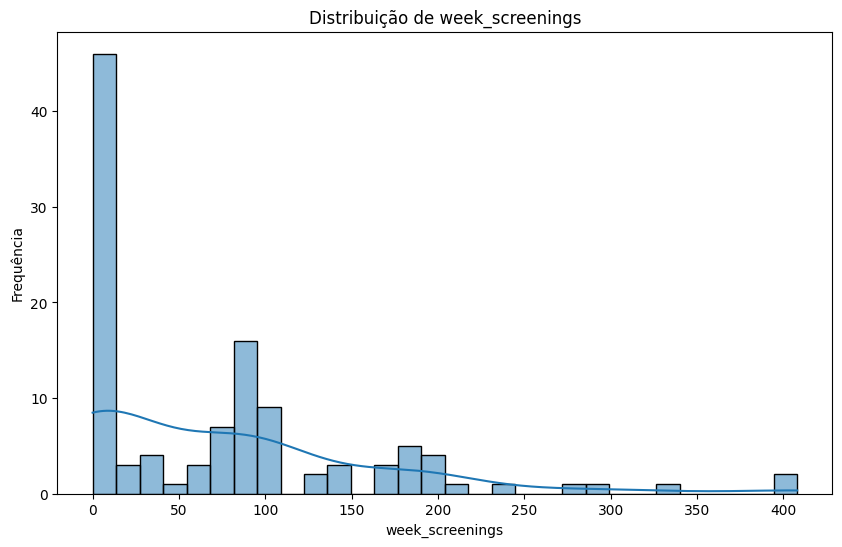

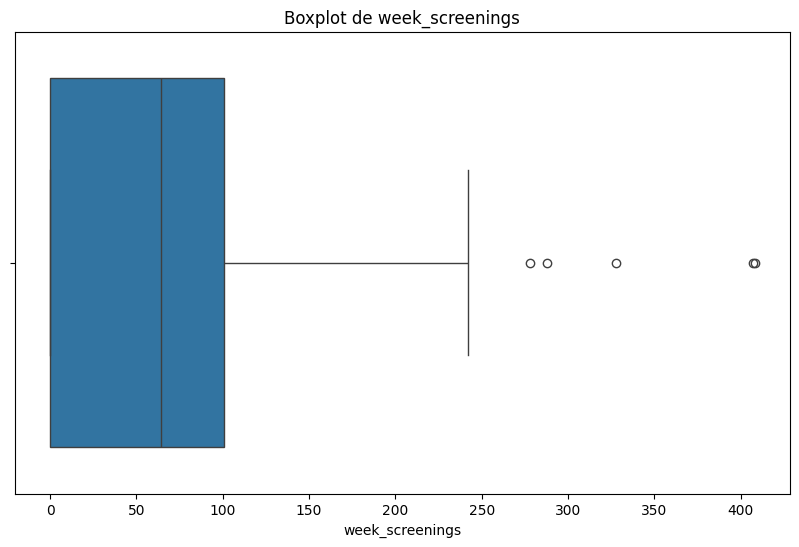

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_week_full['week_screenings'], bins=30, kde=True)
plt.title('Distribuição de week_screenings')
plt.xlabel('week_screenings')
plt.ylabel('Frequência')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_week_full['week_screenings'])
plt.title('Boxplot de week_screenings')
plt.xlabel('week_screenings')
plt.show()

1. Histograma de week_screenings
Distribuição Assimétrica: O histograma mostra uma distribuição bastante assimétrica, com uma concentração significativa de registros com valores baixos, especialmente em 0. Isso é consistente com as estatísticas descritivas que indicavam um número considerável de semanas sem triagens.
Cauda Longa: Existe uma cauda longa à direita, o que indica que há alguns valores de week_screenings muito altos em comparação com a maioria dos registros. Esses valores são outliers e estão puxando a distribuição para a direita.
Picos Secundários: Além do pico em 0, há picos menores em torno de 50 a 100, sugerindo que há um número considerável de semanas com triagens moderadas.

2. Boxplot de week_screenings
Presença de Outliers: O boxplot confirma a presença de outliers, mostrados como pontos fora da "caixa" principal. Esses outliers correspondem aos valores muito altos de week_screenings, como os que aparecem próximos de 300 e 400.
Mediana e Quartis: A mediana está em 64, e o intervalo interquartil (IQR), que vai do 25º ao 75º percentil, é bastante amplo, variando de 0 a 101. Isso indica uma dispersão considerável nos dados, com metade dos registros situando-se dentro deste intervalo.
Limites do Boxplot: A linha do bigode superior termina em torno de 240, indicando que valores acima disso são considerados outliers.

Conclusões

Concentração de Valores Baixos: A maioria das semanas tem poucas ou nenhuma triagem, o que pode refletir padrões operacionais ou sazonais específicos.
Impacto dos Outliers: Os outliers têm um impacto significativo na distribuição geral dos dados, puxando a média para cima. Dependendo do objetivo da análise, pode ser relevante investigar mais profundamente esses outliers para entender seu contexto ou considerar sua remoção ou tratamento durante a análise.
Assimetria na Distribuição: A distribuição assimétrica e a presença de muitos valores 0 são aspectos importantes a considerar, especialmente se você estiver usando métodos estatísticos que assumem uma distribuição normal.

# TARGET daily uniformly distributed

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean_location.xlsx')
df['Location'] = df['Location'].str.strip()
df.loc[df['Location'].eq('Faro') & df['Screening_date'].eq('2022-08-13'), 'Screening_date'] = '2022-08-14'
df.loc[df['Location'].eq('Lisboa') & df['Screening_date'].eq('2023-05-15'), 'Screening_date'] = '2023-05-19'

df.head()

d1 = df.groupby(['Location', 'Screening_date'], as_index=False).size().sort_values(['Location', 'Screening_date'])
d2 = d1.assign(count = d1.groupby(['Location'])['Location'].transform('count'))
d2 = d2[d2['count'].ne(1)]

d2['ndays'] = d2.groupby('Location')['Screening_date'].diff()
d2['nscreens'] = d2['size'].values/d2['ndays'].dt.days
d2

date_range = pd.date_range(start='2022-03-03', end='2024-04-20') #datas mais extremas no dataset

datesdf = pd.DataFrame(date_range, columns=['Screening_date'])

list_dfs = []

groups = d2.groupby('Location')

for _, group in groups:
    list_dfs.append(datesdf.merge(group, how='left').bfill().ffill())

d3 = pd.concat(list_dfs)
d3

# Agrupar por 'Screening_date' e calcular a soma de 'nscreens' para cada data (ou use outra função agregada como média)
d4 = d3.groupby('Screening_date', as_index=False)['nscreens'].sum()

# Criar variável de tendência linear
d4['days_since_start'] = (d4['Screening_date'] - d4['Screening_date'].min()).dt.days

# Se houver um padrão sazonal claro, você pode criar variáveis sazonais
# Por exemplo, seno e cosseno para capturar padrões sazonais anuais
d4['sin_seasonal'] = np.sin(2 * np.pi * d4['days_since_start'] / 365.25)
d4['cos_seasonal'] = np.cos(2 * np.pi * d4['days_since_start'] / 365.25)

df = d4

df

,Screening_date,nscreens,days_since_start,sin_seasonal,cos_seasonal
0,2022-03-03,11.169861,0,0.000000,1.000000
1,2022-03-04,11.169861,1,0.017202,0.999852
2,2022-03-05,11.169861,2,0.034398,0.999408
3,2022-03-06,11.169861,3,0.051584,0.998669
4,2022-03-07,11.169861,4,0.068755,0.997634
...,...,...,...,...,...
775,2024-04-16,12.874846,775,0.692903,0.721031
776,2024-04-17,12.874846,776,0.705204,0.709005
777,2024-04-18,12.874846,777,0.717295,0.696769
778,2024-04-19,12.874846,778,0.729175,0.684328


In [9]:
# Exibindo estatísticas descritivas básicas
estatisticas = df['nscreens'].describe()
print(estatisticas)

count    780.000000
mean      10.218097
std        1.301990
min        8.657425
25%        8.924788
50%        9.601172
75%       11.169861
max       12.874846
Name: nscreens, dtype: float64


Estatísticas Descritivas
Contagem (count):

Há 780 registros para a variável nscreens, o que indica que este conjunto de dados está completo, sem valores nulos.
Média (mean):

A média dos valores é 10,22. Isso sugere que, em média, o valor de nscreens é ligeiramente superior a 10.
Desvio padrão (std):

O desvio padrão é relativamente baixo, em 1,30. Isso indica que os valores de nscreens não variam muito em torno da média. Os dados são, portanto, bastante concentrados próximos ao valor médio.
Mínimo (min):

O valor mínimo é 8,66. Isso indica que o menor valor observado é próximo de 9.
Quartis:

25º percentil (25%): 8,92. Um quarto dos registros tem valores de nscreens abaixo de aproximadamente 8,92.
Mediana (50%): 9,60. A mediana está próxima do valor médio, o que indica uma distribuição relativamente simétrica em torno da média.
75º percentil (75%): 11,17. Três quartos dos registros têm valores de nscreens abaixo de aproximadamente 11,17.
Máximo (max):

O valor máximo é 12,87, que é apenas um pouco maior que a média, reforçando a ideia de que a maioria dos dados está concentrada em um intervalo estreito.
Análise
Distribuição Relativamente Estreita:

A baixa variabilidade dos dados, como indicado pelo desvio padrão pequeno, sugere que os valores de nscreens são bastante consistentes, com pouca dispersão ao redor da média.
Simetria:

A proximidade da mediana com a média sugere que a distribuição é relativamente simétrica, sem uma cauda significativa puxando a distribuição para cima ou para baixo.
Ausência de Outliers Extremos:

O intervalo entre o mínimo (8,66) e o máximo (12,87) é relativamente pequeno. Isso sugere que não há outliers extremos neste conjunto de dados, e os valores de nscreens são bastante uniformes.

Conclusão

Estabilidade dos Dados: Os valores de nscreens são bastante estáveis, sem grandes variações ou outliers significativos. Isso pode indicar uma variável bem controlada ou que o processo de coleta de dados é consistente.
Distribuição Concentrada: A concentração dos dados em torno da média facilita a análise, uma vez que não há distorções significativas causadas por valores extremos.
Interpretação: Dependendo do contexto, se nscreens representa algo como o número de triagens em uma situação padrão, os resultados indicam um cenário bastante regular, sem variações drásticas entre os registros.

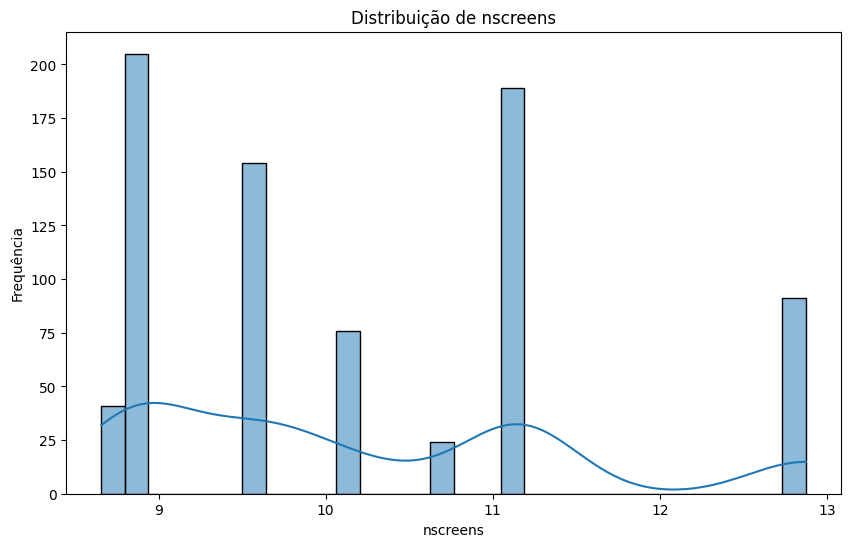

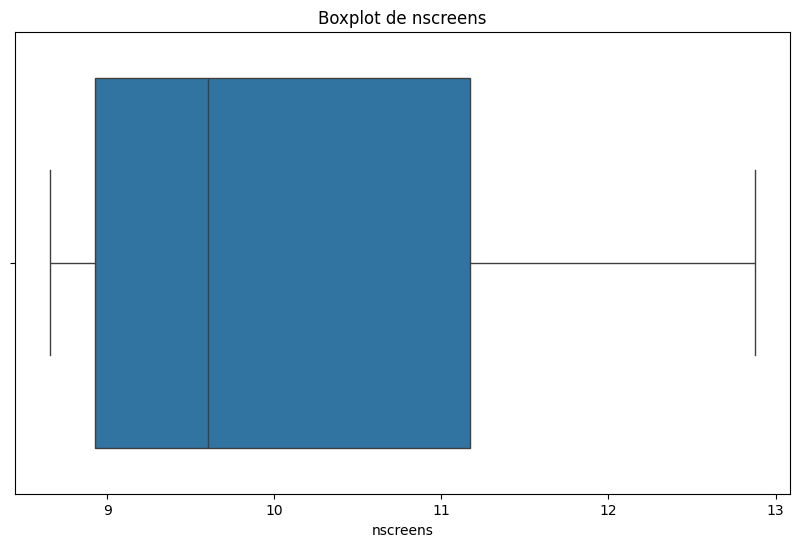

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['nscreens'], bins=30, kde=True)
plt.title('Distribuição de nscreens')
plt.xlabel('nscreens')
plt.ylabel('Frequência')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['nscreens'])
plt.title('Boxplot de nscreens')
plt.xlabel('nscreens')
plt.show()

1. Histograma de nscreens
Distribuição Multimodal: O histograma mostra uma distribuição multimodal, com picos notáveis em torno dos valores 9, 10, 11, e 12. Isso indica que os dados têm várias concentrações de valores em torno desses números, possivelmente devido a diferentes categorias ou grupos dentro do conjunto de dados.
Frequência Elevada em Valores Específicos: Observa-se que os valores 9, 10, e 11 têm frequências particularmente elevadas, com mais de 200 registros em torno desses números. Isso sugere que, para muitos registros, o número de nscreens é padronizado em torno desses valores.

2. Boxplot de nscreens
Mediana e Quartis: O boxplot mostra que a mediana está em torno de 10, o que é consistente com as estatísticas descritivas. O intervalo interquartil é relativamente estreito, indo de aproximadamente 9 a 11. Isso reflete a baixa variabilidade dos dados.
Simetria: O boxplot é simétrico, sem evidência de outliers significativos, o que confirma a distribuição simétrica dos dados em torno da mediana.
Amplitude: Os bigodes do boxplot se estendem de aproximadamente 8,66 a 12,87, cobrindo todo o intervalo observado na distribuição. Não há outliers significativos fora desse intervalo.

Conclusões

Regularidade dos Dados: A distribuição dos dados de nscreens é bastante regular, com frequências elevadas concentradas em valores específicos. Isso pode indicar padrões operacionais ou decisões padronizadas que levam a essa distribuição.
Distribuição Multimodal: A presença de múltiplos picos no histograma sugere que os dados podem estar segmentados em diferentes categorias ou que existem múltiplos processos subjacentes que produzem esses valores.
Consistência: A ausência de outliers no boxplot e a estreita amplitude interquartil indicam que os valores de nscreens são bastante consistentes, o que pode facilitar a modelagem e previsão, se necessário.